# SQLD 막판 최종 정리

### 1. SQL 명령문 개괄
1. SQL 실행 순서 : FROM - WHERE - GROUP BY - HAVING - SELECT - ORDER BY
1. DDL : CREATE, ALTER, DROP, TRUNCATE
1. DML : SELECT, INSERT, UPDATE, DELETE
1. DCL : GRANT, REVOKE
1. TCL : COMMIT, ROLLBACK

### 2. SELECT
1. DISTINCT : 집약 기능. 중복 제거. ex) DISTINCT DEPTNO, MGR = GROUP BY DEPTNO, MGR --> DEPTNO, MGR에 대해서 중복 제거
1. ALIAS 
    - SELECT : 1. AS 생략 가능 2. 컬럼명에 띄어쓰기 있으면 ""을 사용. ex)"직원 번호"
    - FROM : 1. AS 사용 불가
1. CONCAT(인수1, 인수2) : 인수가 반드시 2개만 가능. 
    - +(SQL SERVER), ||(ORACLE)는 인수 개수 상관 없이 사용 가능

### 3. 논리 연산자
- 연산순위 : NOT -> AND -> OR
- AND : 둘 다 만족 시켜야 함
- OR  : 하나만 만족 시켜도 됨
- NOT : 조건의 반대

### 4. SQL 연산자
1. BETWEEN : 컬럼 BETWEEN 1 AND 3  --->  1 <= 컬럼 <= 3
1. IN      : 컬럼 IN (1, 2, 3)     --->  컬럼 = 1 OR 컬럼 = 2 OR 컬럼 = 3
1. LIKE    
    - _ : 미지의 한글자
    - % : 0 이상의 글자
    - ESCAPE : 와일드카드인 (_, %)를 문자로 취급  <b>ex) ENAME LIKE 'A_A' ESCAPE '@' --> A@_A</b>
1. ROWNUM(ORACLE), TOP(SQL SERVER) 
    - ROWNUM = 1 : WHERE 조건절에서 ROWNUM = 1을 포함
    - TOP : SELECT TOP(N) --> 상위 N개
    
### 5. NULL<span style="color:red">(중요)</span>
1. NULL의 정의 : 부재, 모르는 값
1. NULL의 산술연산 : NULL을 포함한 연산은 알수없음(unknown) ex) NULL+2, NULL*NULL
1. NULL의 비교연산 : WHERE(조건 = UNKNOWN) --> FALSE ex) NULL = NULL, NULL = 2
1. 정렬상 의미 : ORACLE(매우 큰 값), SQL SERVER(매우 작은값)
1. NULL의 연산자
    - NVL(값1, 값2) : 값1 IS NULL -> 값2, 아니라면 값1
    - NVL2(값1, 값2, 값3) : 값1 IS NULL -> 값3, 아니라면 값2
    - ISNULL(값1, 값2) : 값1 IS NULL -> 값2, 아니라면 값1. NVL과 같음
    - NULLIF(값1, 값2) : 값1과 값2가 같으면 NULL, 다르면 값1
    - COALESCE(값1, 값2 ....) : 널이 아닌 첫번재 값

### 6. 정렬
1. 정렬의 특성
    - 가장 마지막에 실행
    - 성능이 느려질 수 있음
    - NULL값과의 관계
1. 컬럼번호 정렬
    - 출력되는 컬럼의 수 보다 큰 값이 나올 수 없음
    - SELECT에 존재하지 않는 컬럼으로 정렬 가능
1. 인수 두개 이상의 정렬
    - 첫번째 값으로 정렬하고, 같은 값이 있다면 두번째 값으로 정렬
    
### 7. 숫자 함수
1. ROUND() : ROUND(3.14) -> 3, ROUND(3.14, 0) -> 3, ROUND(3.14, 2) -> 3.14
1. CEIL(ORACLE)/CEILING(SQL SERVER) --> CEIL(3.14) -> 4
1. FLOOR(ORACLE) -> ROUND(3.14) -> 3

### 8. 문자열 함수
1. UPPER 
1. LOWER 
1. LPAD/RPAD : DEPTNO = 3일때 LPAD(DEPTNO, 5) --> '    3', RPAD(DEPTNO, 5, '*') --> '3****'
1. LTRIM/RTRIM/TRIM : LTRIM('    NEW    ') --> 'NEW    ', TRIM('    NEW    ', 'NEW') -> '        '
1. SUBSTR : SUBSTR('ABCDEFG',4) -> 'DEFG', SUBSTR('ABCDEFG',-4) -> 'DEFG', SUBSTR('ABCDEFG',2, 3) -> 'BCD'
1. INSTR : 입력된 문자열이 일치하면 그 첫번째 인덱스값을 반환해주고, 일치하는 문자가 없으면 0을 반환
    - INSTR('ABCDEFG','CDE') --> 3
    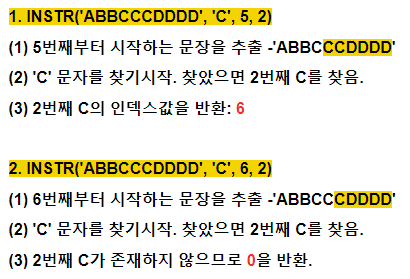
    - [출처] : https://m.blog.naver.com/PostView.naver?isHttpsRedirect=true&blogId=c6369&logNo=220734317313
1. SUBSTRB/INSTRB : BYTE값을 출력함
1. REPLACE 
    - 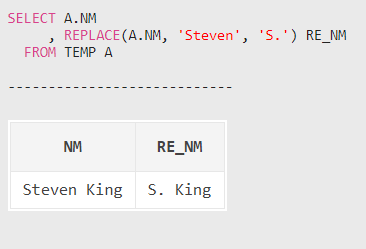
     - [출처] : https://gent.tistory.com/228

### 9. 날짜 함수
1. TO_CHAR : TO_CHAR(SYSDATE, 'YYYYMM')  --> 202201
1.TO_DATE : TO_DATE('202201', 'YYYYMM') --> 22/01/01
    - 입력 문자와 형변환 형식과 맞지 않으면 오류 발생,,, 따라서 TO_DATE(SYSDATE, 'YYYYMM')는 오류이다.
1. SYSDASTE(ORACLE)/GETDATE()(SQL SERVER)
1. 날짜 데이터 + 100 : 100일 이후

### 10. DECODE/<span style="color:red">CASE</span>
- 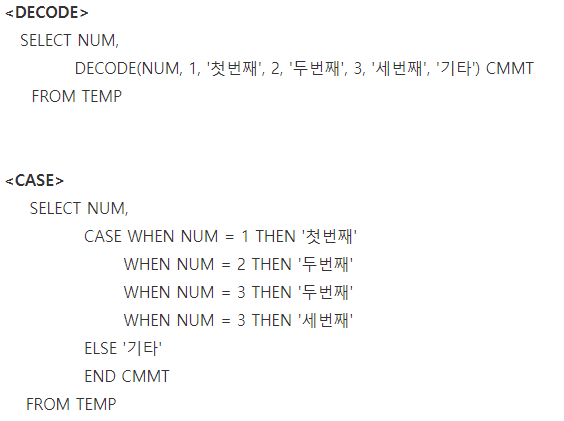
- [출처] : https://dorongdogfoot.tistory.com/79
- CASE문에서 ELSE가 생략되면 NULL

### 11. 집계 함수<span style="color:red">(중요)</span>
1. NULL과의 관계
|A|B|C|
|:---------|:---------|:-----------------|
|NULL|NULL|1|
|3|2|2|
|NULL|2|3|

- SUM(A) = 3
- SUM(B) = 4
- COUNT(A) = 1
- COUNT(*) = 3
- SUM(A+B+C) = 7


### 12. GROUP BY
1. 집약 기능 
1. GROUP BY A --> NULL, 3 (표는 위에 11번 참고)

### 13. JOIN
1. NATURAL JOIN 
    - 반드시 두 테이블 간의 동일한 이름, 타입을 가진 컬럼이 필요
    - 조인에 이용되는 컬럼은 명시하지 않아도 자동으로 조인에 사용
    - 중복된 컬럼 제거
    - 중복된 컬럼이 제일 앞에 등장
    - 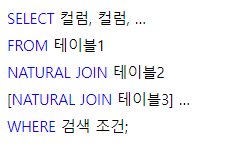
    - [출처] : https://keep-cool.tistory.com/41
   
1. USING 
    - 자연 조인에서 사용하는 테이블간에 동일한 이름과 형식의 컬럼이 둘 이상인 경우 자연 조인을 사용할 수 없으므로, 이때 USING 절을 이용한 조인문을 이용하여 조인문을 구사
    - USING 절은 조인에 사용될 컬럼을 지정
    - NATURAL 절과 USING 절은 함께 사용할 수 없음
    - 조인에 이용되지 않은 동일 이름을 가진 컬럼은 컬럼명 앞에 테이블명을 기술
    - 조인 컬럼은 괄호로 묶어서 기술
    - 중복된 컬럼 제거
    - 중복된 컬럼이 제일 앞에 등장
    - ALIAS 사용 안됨
    - 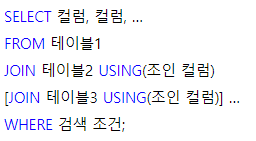
    - [출처] : https://keep-cool.tistory.com/41
    
1. LFET OUTER JOIN
    - A LERT OUTER JOIN B : A 테이블을 기준으로 출력
    - A.COL1 = B.COL1(+) 와 같음
1. RIGHT OUTER JOIN
    - A RIGHT OUTER JOIN : B 테이블을 기준으로 출력
    - A.COL1(+) = B.COL1 와 같음
1. FULL OUTER JOIN
    - LEFT OUTER JOIN과 RIGHT OUTER JOIN을 합한 것과 같음
1. <span style="color:red">JOIN은 테이블 2개씩 묶어서 조인</span>

### 14. 서브쿼리
- 서브 쿼리가 들어 갈 수 있는 곳은 아래와 같다.
1. SELECT : 스칼라 서브쿼리(SCALAR SUBQUERY)
1. FROM : INLINE VIEW(메인 쿼리의 컬럼 사용 가능)
1. WHERE : 거의 모든 서브쿼리(중첩 서브쿼리)
1. HAVING : 거의 모든 서브쿼리(중첩 서브쿼리)
1. ORDER BY : 스칼라 서브쿼리(SCALAR SUBQUERY)
1. 상호연관 서브쿼리
    - SELECT DEPARTMENT_ID<BR>
FROM EMPLOYEES E<BR>
WHERE SALARY > (<BR>
    SELECT <BR>
        ROUND(AVG(SALARY))<BR>
        FROM EMPLOYEES<BR>
        WHERE DEPARTMENT_ID = E.DEPARTMENT_ID<BR>
)<BR>

7. IN
8. ANY / SOME
9. ALL
10. EXISTS

### 15. 집합 연산자
1. UNION : 중복 데이터 제거, 정렬 작업 있음, 느리다
1. INTERSECT : 교집합, 정렬작업 있음
1. MINUS(ORACLE) / EXCEPT(SQL SERVER) : 차집합, 정렬 작업 있음
1. UNION ALL : 중복 데이터 존재, 정렬 작업 없음, 빠르다

### 16. DDL
1. DELETE : 데이터만 삭제, ROLLBACK으로 데이터를 되살릴수 있음
1. TRUNCATE : 테이블의 구조는 남으면 데이터만 삭제, ROLLBACK/COMMIT 사용 불가
1. DROP : 테이블과 데이터 모두 삭제

### 17. DML 
1. INSERT 
1. UPDATE
1. DELETE
1. MERGE INTO

### 18. 제약 조건<SPAN STYLE="COLOR:RED">(중요)</SPAN>
1. PK : UNIQUE + NOT NULL
1. UNIQUE
1. NOT NULL

### 19. DCL
1. GRANT : 권한 부여
1. REVOKE : 권한 뺏어오기
1. ROLE(객체)의 특징
    - ROLE을 이용하면 권한 부여와 회수를 쉽게 할 수 있다.
    - ROLE은 CREATE ROLE권한을 가진 USER에 의해서 생성 된다.
    - 한 사용자가 여러개의 ROLL을 ACCESS할 수 있고, 여러 사용자에게 같은 ROLE을 부여할 수 있다.
    - 시스템 권한을 부여하고, 취소할 때와 동일한 명령을 사용하여 사용자에게 부여하고, 취소 한다.
    - 사용자는 ROLE에 ROLE을 부여할 수 있다.
    - 오라클 데이터베이스를 설치하면 기본적으로 CONNECT, RESOURCE, DBA ROLE이 제공 된다.
    
### 20. VIEW
1. 독립성
1. 편리성
1. 보안성
1. SQL 명령문을 따로 저장하는 공간이 필요함

### 22. 그룹함수<SPAN STYLE="COLOR:RED">(중요)</SPAN>
1. ROLL UP : 계층 구조
1. CUBE : 순서 바뀌어도 상관없음, 모든 경우의 수에 대해 집계
1. GROUPING SETS : 순서 바뀌어도 상관없음

### 23. TCL
1. COMMIT
1. ROLLBACK
1. AUTO COMIIT OFF : DDL의 COMMIT기능 없앤 것
1. BEGIN TRANSACTION : DDL의 COMMIT기능 없앤 것

### 24. 윈도우 함수
1. ROWS BETWEEN
1. RANGE BETWEEN
1. RANK : 중복인 등수가 있으면 그 뒤에 순위 중복만큼 건너뜀 ex)1, 1, 3
1. DENSE RANK : 중복인 등수가 있어도 건너뛰지 않음 ex) 1, 1, 2
1. PARTITION BY : ROWNUM에서 같이 사용
1. ORDER BY

### 25. 계층형 질의
1. PRIOR 자식 = 부모 : 역방향
1. PRIOR 부모 = 자식 : 순방향

### 26. 절차형 PL/SQL
1. EXCEPTION : 생략 가능
1. PROCEDURE
    - 어떤 작업을 절차적 일괄처리 작업하는데 사용
    - 반복적인 트랜잭션을 수행할 수 있는 PL/SQL 블록
    - db내에 미리 컴파일되어 저장되있다가 필요할시 매번 사용가능
1. TRIGGER
    - 지정된 이벤트 발생시 자동으로 실행되는 프로시저와 같은 것이다.
    - 명시적으로 호출 필요없이 DDL, DML 또는 일부 DB 작업(LOGOFF, SHUTDOWN)에 대한 
    - 응답으로 호출 할 수 있다.
    - Ex) 입고테이블에 insert 트리거 작성하면, 테이블에 자료 추가될 떄 
        - 상품 테이블에 재고 수량이 되도록 트리거 작성한다.
1. USER DEFINED FUNCTION
    - 프로시저와 차이는 리턴값의 유무. 프로시저는 수행하는 절차가 목적이라 리턴값이 없어도 되지만, 
    - 함수는 결과 도출이 목적이기에 리턴값이 존재한다. 단 하나의 리턴값만 있어야한다.
    
### 27. 엔터티
1. 엔터티 특징
    - 속성을 2개 이상
    - 인스턴스 2개 이상
    - 관계는 하나 이상
    - 업무에서 사용되야하고 업무 프로세스에 이용되어야 함
1. 유무형에 따른 분류
    - 유형엔터티 : 물리적인 형태가 있고 안정적이며 지속적으로 활용되는 엔터티로 업무로부터 엔터티를 구분하기가 가장 용이
    - 개념엔터티 : 물리적인 형태는 존재하지 않고 관리해야 할 개념적 정보로 구분이 되는 엔터티
    - 사건엔터티 : 업무를 수행함에 따라 발생되는 엔터티, 비교적 발생량이 많으며 각종 통계자료에 이용
1. 발생시점에 따른 분류
    - 기본엔터티 : 그 업무에 원래 존재하는 정보, 다른 엔터티로부터 주식별자를 상속받지 않고 자신의 고유한 주식별자를 가짐
    - 중심엔터티 : 기본엔터티로부터 발생되고 그 업무에 있어서 중심적인 역할, 데이터의 양이 많이 발생되고 다른 엔터티와의 관계를 통해 많은 행위엔터티를 생성
    - 행위엔터티 : 두 개 이상의 부모엔터티로부터 발생되고 자주 내용이 바뀌거나 데이터량이 증가, 분석초기 단계에서는 잘 나타나지 않으며 상세 설계단계나 프로세스와 상관모델링을 진행하면서 도출
    
### 28. 속성
1. 분류
    - 기본 속성 : 사원이름, 직책이름, 고용일자 등 가장 일반적인 속성
    - 설계 속성 : 업무상 필요한 데이터 외에 데이터 모델링을 위해, 업무를 규칙화하기 위해 속성을 새로 만들거나 변형하여 정의하는 속성
    - 파생 속성 : 다른 속성에 영향을 받아 발생하는 속성으로, 계산된 값들이 여기에 해당. 

### 29. 도메인
1. <U>값의 범위</U>
1. 데이터 유형, 크기, 제약조건
1. CHECK, PRIMARY KEY가 도메인에 해당

### 30. 관계
1. 식별자 : 실선
1. 비식별자 : 점선
- 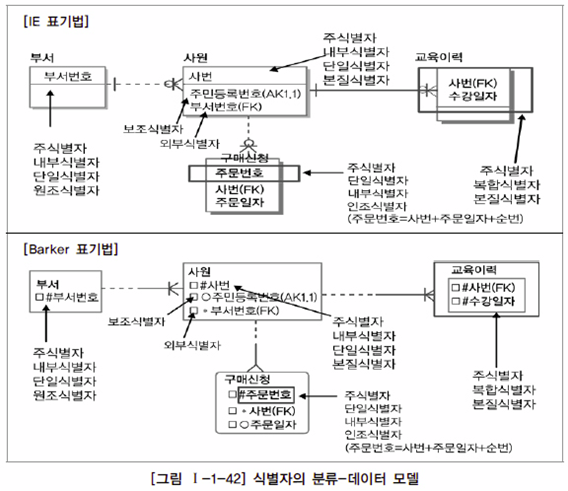
- [출처] : http://haisins.epac.to/wordpress/?p=857

### 31. 식별자
1. 주식별자
    - 최소성 : 주식별자를 구성하는 속성의 수는 유일성을 만족하는 최소의 수가 되어야 함
    - 대표성 : 엔터티를 대표할 수 있어야 함
    - 유일성 : 엔터티의 인스턴스를 유일하게 식별
    - 불변성 : 자주 변경되지 않아야 함
    - 존재성 : 주식별자가 지정되면 반드시 값이 들어와야 함
1. 후보키 : 유일성과 최소성을 만족하는 키
1. 슈퍼키 : 유일성은 만족하지만 최소성을 만족하지 않는 키
1. 대체키 : 여러개의 후보키 중에서 기본키를 설정하고 남은 키
1. 외래키 : 참조 무결성을 확인하기 위해 사용되는 키
    
### 32. 식별자 관계  VS 비식별자 관계
1. ERD 서술 규칙
    - 좌측 상단에서 우측 하단으로 이동하는 것을 권장함
    - 관계명 반드시 표기 안해도 됨
    - UML은 객체 지향에서만 사용
    
||식별|비식별|
|:---------|:---------|:-----------------|
|관계|강한 관계|약한 관계|
|단점|SQL 구문 복잡<BR> PK 속성 수 많아짐|불필요한 조인이 많이 생겨 느려짐|
|ERD|실선|점선|

### 33. 성능 데이터 모델링
1. 아키텍쳐 : 데이터 베이스 구조 변경(분할, 파티션)
1. SQL문 : 조인 수행 원리, 옵티마이저, 실행계획

### 34. 정규화
* <B>2. 데이터 모델과 성능 참고</B>
1. 1차 : 원자성
1. 2차 : 부분함수 종속
1. 3차 : 이행함수 종속
1. BCMF : 후보키 분리

### 35. 이상의 종류
1. 삽입 이상 : 자료를 삽입할 때 의도하지 않은 자료까지 삽입해야만 자료를 테이블에 추가가 가능한 현상
1. 갱신 이상 : 중복된 데이터 중 일부만 수정되어 데이터 모순이 일어나는 이상
1. 삭제 이상 : 어떤 정보를 삭제하면, 유용한 다른 정보까지 삭제되어버리는 이상

### 36. 반정규화
1. 데이터 무결성을 해침
- https://lipcoder.tistory.com/337
- https://eehoeskrap.tistory.com/57

### 37. 대량 데이터에 따른 성능
1. ROW MIGRATION : 최초로 저장된 블럭에 프리 스페이스가 없어서 새로운 블럭을 할당받아서 거기로 옮긴뒤 수정하는것
1. ROW CHAINING : 하나의 값이 여러블록에 거쳐 저장될때를 말함, 조회할 때 여러블록을 읽어야하므로 성능이떨어짐
1. 해결방법
    - LIST 파티셔닝
    - RANGE 파티셔닝 : 관리 쉬움, 가장 많이 사용됨
    - HASH 파티셔닝 : 관리 어려움
    
### 38. 슈퍼/서브타입
1. 용량
    - 적은 경우 : ONE TO ONE, 트랜잭션이 개별로 들어가는 경우 
    - 많은 경우 : 트랜잭션에 유형에 따라 달라짐... 밑에서 설명
1. 트랜잭션 유형에 따라
    - 공통/차이(PLUS)
    - 전체 통합(SINGLE)

### 39. 분산 데이터베이스
1. <U>데이터 무결성을 해칠 수 있음</U>
1. 지역 자치성
1. 신뢰성과 가용성
1. 효용성과 융통성
1. 빠른 응답속도와 통신비용 절감
1. 각 지역 사용자의 요구 수용 증대

### 40. 조인 수행 원리<SPAN STYLE="COLOR:RED">(중요)</SPAN>
1. NL JOIN(NESTED LOOP) : 랜덤 엑세스, 대용량 정렬 작업시 유리
1. SORT MERGE JOIN : 조인키를 기준으로 정렬, 등가 비등가 조인 가능
1. HASH JOIN : 등가 조인만 가능, HASH 함수 사용, 선행 테이블 작음, 별도 저장공간 필요

### 41. 옵티마이저
1. RBO(RULE BASED OPTIMIZER) : 규칙
2. CBO(COST BASED OPTIMIZER) : 경로

### 42. 인덱스
1. 인덱스를 사용하지 않을 때
    - 부정형(NOT) 사용 시 인덱스 사용하지 않음
    - LIKE 사용 시 인덱스 사용하지 않음
    - 묵시적 형변환 시 인덱스 사용하지 않음
1. 인덱스 사용 시 성능 감소
    - INSERT / UPDATE / DELETE 
    - UPDATE는 성능 감소하지 않을 수도 있음
    
### 43. 실행계획
1. 실행순서 맞추기

### 44. PIVOT / UNPIVOT
- PIVOT() : 행을 열로 변환하기 위해서는 사용, 그룹함수를 이용하여 통계를 추출할 때 많이 사용
- UNPIVOT() : 열을 행으로 바꾸기 위해서는 을 사용, 가로의 칼럼을 세로의 행으로 바꿈